In [1]:
import pandas as pd

In [3]:
spam_data = pd.read_csv("sms_spam_short.csv")
print('Columns: ', spam_data.columns)
print('\nClassification target frequnecy:')
display(spam_data.type.value_counts())
print('\nClassification target frequnecy distribution:')
display(spam_data.type.value_counts(normalize=True)*100)

Columns:  Index(['type', 'text'], dtype='object')

Classification target frequnecy:


ham     437
spam     63
Name: type, dtype: int64


Classification target frequnecy distribution:


ham     87.4
spam    12.6
Name: type, dtype: float64

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import operator
vect=CountVectorizer()

vect_= vect.fit_transform(spam_data.text)
c1 = vect.get_feature_names()
c2 = vect_.toarray().sum(axis = 0)

spam_data_text_df=pd.DataFrame({'Terms': c1, 'Term_Frequency': c2})
spam_data_text_df=spam_data_text_df[['Terms','Term_Frequency']]
spam_data_text_df.sort_values('Term_Frequency',ascending=False).head()

,Terms,Term_Frequency
2215,you,202
1952,to,193
1906,the,166
1029,in,108
225,and,90


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df= 2)  
X = vectorizer.fit_transform(spam_data.text)
idf = vectorizer.idf_
Terms=vectorizer.get_feature_names()
spam_data_text_df=pd.DataFrame({'Terms': Terms, 'IDF_Terms': idf})
spam_data_text_df=spam_data_text_df[['Terms','IDF_Terms']]
spam_data_text_df.sort_values('IDF_Terms').head(10)

,Terms,IDF_Terms
661,to,2.232999
769,you,2.282132
638,the,2.437483
331,in,2.673311
334,is,2.885873
50,and,2.899118
473,of,3.139069
335,it,3.173555
123,call,3.191254
447,my,3.191254


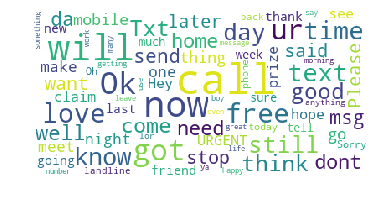

In [7]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
wordcloud = WordCloud( background_color ='white',
                       max_words=75,
                       max_font_size=50
                     ).generate(' '.join(spam_data.text.tolist()))
                           
plt.imshow(wordcloud)
plt.axis('off')
plt.show()